In [1]:
import random
import math
import decimal
import re
import pandas as pd
import numpy as np

from sklearn import decomposition

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.mixture import BayesianGaussianMixture
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KernelDensity
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

set random seed

In [2]:
random.seed(11915043)
np.random.randint(5,10)

5

<H2> P1 : IRIS – HIERARCHICAL FISHER </H2>

In [3]:
iris = pd.read_csv('DMG-2 Assignment Data Files/iris/iris.data', header=None, names =
                   ['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])
iris.sample(5)

,sepal length,sepal width,petal length,petal width,class
146,6.3,2.5,5.0,1.9,Iris-virginica
18,5.7,3.8,1.7,0.3,Iris-setosa
137,6.4,3.1,5.5,1.8,Iris-virginica
26,5.0,3.4,1.6,0.4,Iris-setosa
132,6.4,2.8,5.6,2.2,Iris-virginica


### Two classes in IRIS are more “similar” to each other. Find which ones using scatter plots. Lets say class 1 and class 2.

As seen in plots below 'Iris-versicolor' and 'Iris-virginica' are more similar to each other

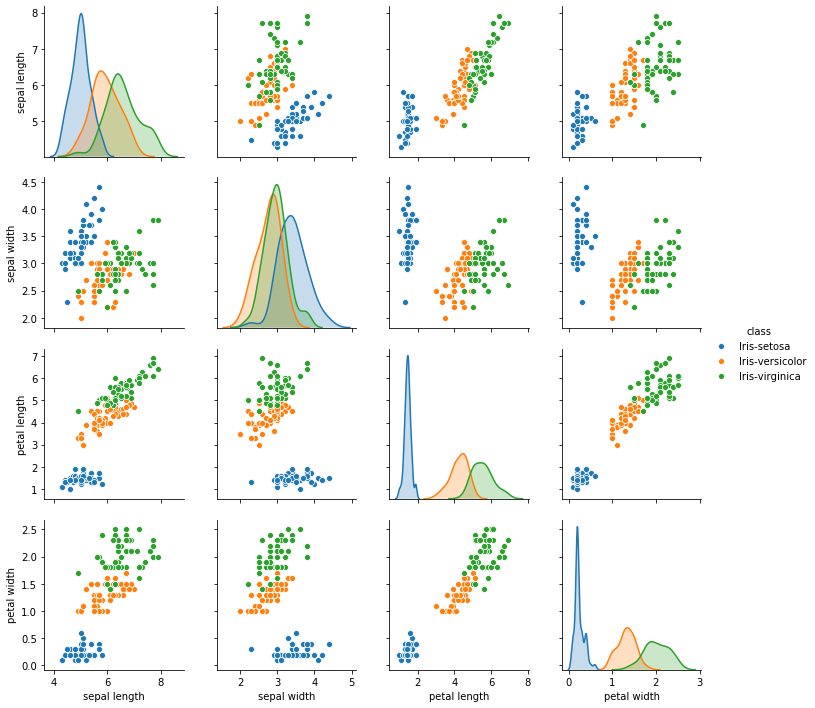

In [4]:
sns.pairplot(iris, hue = 'class')

### Lets create a “meta class” combining class 1 and class 2 (or whichever are the two most similar classes). Lets call it class 4.

In [5]:
iris['versi-virgi'] = np.where((iris['class'] == 'Iris-versicolor') | (iris['class'] == 'Iris-virginica'), 1, 0)
iris.sample(5)

,sepal length,sepal width,petal length,petal width,class,versi-virgi
140,6.7,3.1,5.6,2.4,Iris-virginica,1
67,5.8,2.7,4.1,1.0,Iris-versicolor,1
133,6.3,2.8,5.1,1.5,Iris-virginica,1
4,5.0,3.6,1.4,0.2,Iris-setosa,0
21,5.1,3.7,1.5,0.4,Iris-setosa,0


In [6]:
train, test = train_test_split(iris, test_size=0.3)

/Users/anmol/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


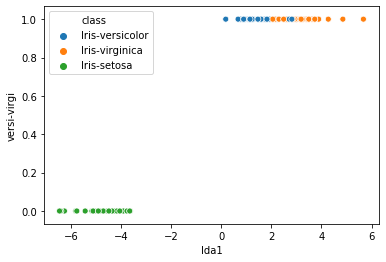

In [7]:
#Ref https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html

lda = LinearDiscriminantAnalysis()
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
target = 'versi-virgi'

lda1 = lda.fit(train[features], train[target])
lda1_dis = lda1.transform(train[features])
train['lda1'] = lda1_dis

ax = sns.scatterplot(x="lda1", y="versi-virgi", hue="class", data=train)


### Create the second Fisher projection by trying to discriminate class 1 from class 2 (the original two similar classes)

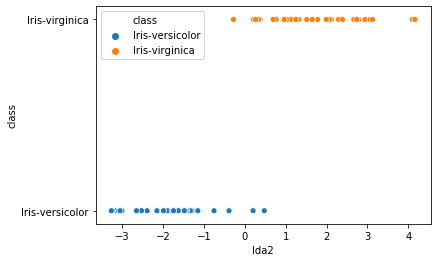

In [8]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
target = 'class'

train = train[(train['class'] == 'Iris-versicolor') | (train['class'] == 'Iris-virginica')]
lda = LinearDiscriminantAnalysis(n_components=1)
lda2 = lda.fit(train[features], train[target])
lda2_dis = lda2.transform(train[features])
train['lda2'] = lda2_dis

ax = sns.scatterplot(x="lda2", y="class", hue="class", data=train)

### Now project the entire data in these two projections and color code the class points.

In [9]:
test['lda1'] = lda1.transform(test[['sepal length', 'sepal width', 'petal length', 'petal width']])
test['lda2'] = lda2.transform(test[['sepal length', 'sepal width', 'petal length', 'petal width']])

/Users/anmol/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/anmol/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Comment on what you observed and did.

Plot how the original four features were classifying the data

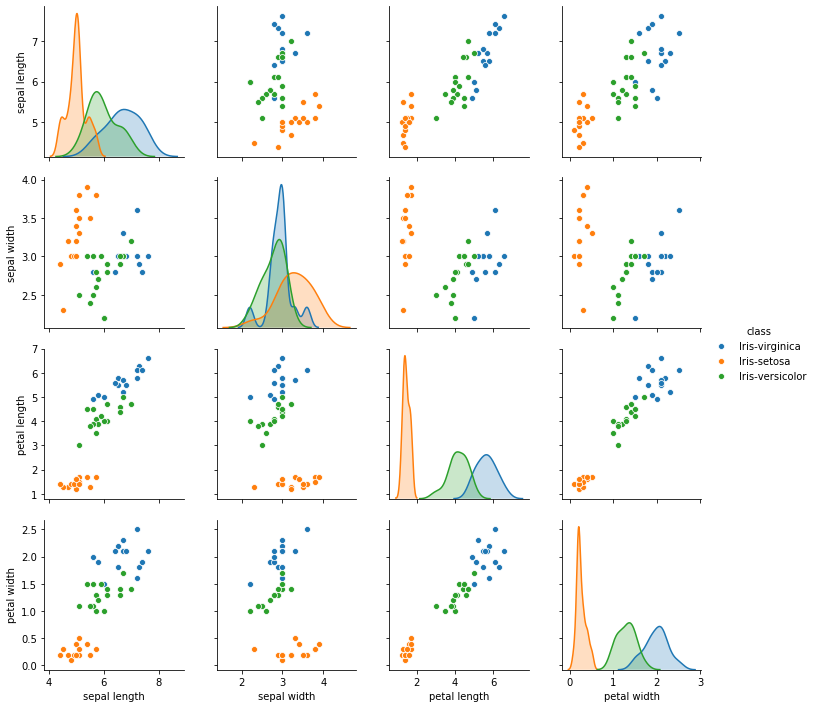

In [10]:
sns.pairplot(hue='class', data=test[['sepal length', 'sepal width', 'petal length', 'petal width', 'class']])

We can clearly see the difference between all three classes ie. setosa, versicolor and vigginica using lda projections. Which was not clear earlier using original feature. Hence it's useful projection

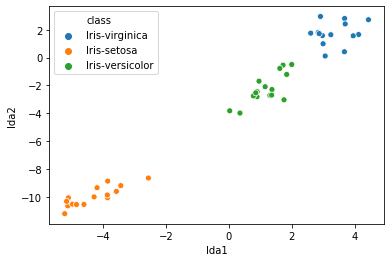

In [11]:
ax = sns.scatterplot(x="lda1", y="lda2", hue="class", data=test)

<H2> P2 : MUSHROOM information gain </H2>

### Take the MUSHROOM training data. There are 20+ features and 2 classes. We want to find the BEST feature using the three purity measures: Accuracy, Gini Index, and Entropy.

In [12]:
col_names = ['class',
             'cap-shape',
             'cap-surface',
             'cap-color',
             'bruises',
             'odor',
             'gill-attachment',
             'gill-spacing',
             'gill-size',
             'gill-color',
             'stalk-shape',
             'stalk-root',
             'stalk-surface-above-ring',
             'stalk-surface-below-ring',
             'stalk-color-above-ring',
             'stalk-color-below-ring',
             'veil-type',
             'veil-color',
             'ring-number',
             'ring-type',
             'spore-print-color',
             'population',
             'habitat']
mushroom = pd.read_csv('DMG-2 Assignment Data Files/Mushroom/agaricus-lepiota.data',
                       index_col=None,
                       header=None,
                       names=col_names)
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Logic below : For each feature, partition the data into k regions where k is the number of values the feature can take.

- Take one feature at a time from dataframe
- create a subset of data with that feature and class labels
- Groupby count to partition data into K features where k is no of values feature can take

### Measure the Information gain due to each feature. Generate a table with the following columns:
- Feature_name
- Accuracy
- GINI index
- Entropy (NOTE: Use log_k for a feature with k values)

In [13]:
#define a empty dataframe for result set
result_set = pd.DataFrame(columns = ['Feature', 'Accuracy', 'Gini', '1-Entropy'])
result_set

,Feature,Accuracy,Gini,1-Entropy


In [14]:
#No. of rows
total_rows_data = mushroom.shape[0]

for column in col_names[1:] :
    df_feature_subset = mushroom[[column,'class']]
    feature_partition = df_feature_subset.groupby([column,'class']).size().unstack(fill_value=0)
    
    #Ref : https://towardsdatascience.com/gini-index-vs-information-entropy-7a7e4fed3fcb
    for index, row in feature_partition.iterrows():
        partition_total_sum = row['e'] + row['p']
        prob_e_class = row['e']/partition_total_sum
        prob_p_class = row['p']/partition_total_sum

        # calculate accuracy for each partition
        if(row['e'] > row['p']) :
            feature_partition.at[index,'Parition Accuracy'] = prob_e_class
        else :
            feature_partition.at[index,'Parition Accuracy'] = prob_p_class
        feature_partition.at[index,'Weighted Accuracy'] = partition_total_sum*feature_partition.loc[index,'Parition Accuracy']/total_rows_data

        #calculate gini index for each partition
        feature_partition.at[index,'Gini Index'] = prob_e_class**2 + prob_p_class**2
        feature_partition.at[index,'Weighted Gini Index'] = partition_total_sum*feature_partition.loc[index,'Gini Index']/total_rows_data

        #calculate entropy for each partition
        entropy = 0
        num_of_partitions = feature_partition.shape[0]
        if(num_of_partitions > 1) :
            print(num_of_partitions)
            if(prob_e_class > 0) :
                entropy += prob_e_class*math.log(prob_e_class, num_of_partitions)
            if(prob_p_class > 0) :
                entropy += prob_p_class*math.log(prob_p_class, num_of_partitions)
        feature_partition.at[index,'Entropy'] = -1*entropy
        feature_partition.at[index,'Weighted Entropy'] = partition_total_sum*feature_partition.loc[index,'Entropy']/total_rows_data
    print()
    
    result_set = result_set.append({'Feature' : column, 
                       'Accuracy': feature_partition[['Weighted Accuracy']].sum()[0].round(4),
                       'Gini' : feature_partition[['Weighted Gini Index']].sum()[0].round(4),
                       '1-Entropy': 1-feature_partition[['Weighted Entropy']].sum()[0].round(4)}, ignore_index=True)
    
result_set.head()

6
6
6
6
6
6
class         e     p  Parition Accuracy  Weighted Accuracy  Gini Index  \
cap-shape                                                                 
b           404    48           0.893805           0.049729    0.810165   
c             0     4           1.000000           0.000492    1.000000   
f          1596  1556           0.506345           0.196455    0.500081   
k           228   600           0.724638           0.073855    0.600924   
s            32     0           1.000000           0.003939    1.000000   
x          1948  1708           0.532823           0.239783    0.502155   

class      Weighted Gini Index   Entropy  Weighted Entropy  
cap-shape                                                   
b                     0.045076  0.188912          0.010511  
c                     0.000492 -0.000000         -0.000000  
f                     0.194024  0.386808          0.150076  
k                     0.061246  0.328459          0.033477  
s                    

2
2
class           e     p  Parition Accuracy  Weighted Accuracy  Gini Index  \
stalk-shape                                                                 
e            1616  1900           0.540387           0.233875    0.503262   
t            2592  2016           0.562500           0.319055    0.507812   

class        Weighted Gini Index   Entropy  Weighted Entropy  
stalk-shape                                                   
e                       0.217808  0.995289          0.430753  
t                       0.288035  0.988699          0.560798  

5
5
5
5
5
class          e     p  Parition Accuracy  Weighted Accuracy  Gini Index  \
stalk-root                                                                 
?            720  1760           0.709677           0.216642    0.587929   
b           1920  1856           0.508475           0.236337    0.500144   
c            512    44           0.920863           0.063023    0.854252   
e            864   256           0.771429   

9
9
9
9
9
9
9
9
9
class                 e     p  Parition Accuracy  Weighted Accuracy  \
spore-print-color                                                     
b                    48     0           1.000000           0.005908   
h                    48  1584           0.970588           0.194978   
k                  1648   224           0.880342           0.202856   
n                  1744   224           0.886179           0.214673   
o                    48     0           1.000000           0.005908   
r                     0    72           1.000000           0.008863   
u                    48     0           1.000000           0.005908   
w                   576  1812           0.758794           0.223043   
y                    48     0           1.000000           0.005908   

class              Gini Index  Weighted Gini Index   Entropy  Weighted Entropy  
spore-print-color                                                               
b                    1.000000         

,Feature,Accuracy,Gini,1-Entropy
0,cap-shape,0.5643,0.5308,0.6324
1,cap-surface,0.5805,0.5200,0.5148
2,cap-color,0.5953,0.5245,0.7101
3,bruises,0.7440,0.6262,0.1933
4,odor,0.9852,0.9715,0.9707


In [15]:
result_set.tail()

,Feature,Accuracy,Gini,1-Entropy
17,ring-number,0.5382,0.5237,0.3939
18,ring-type,0.7755,0.6824,0.7067
19,spore-print-color,0.8680,0.7835,0.8365
20,population,0.7218,0.6193,0.6916
21,habitat,0.6903,0.5974,0.7000


### Plot accuracy vs. 1-Entropy scatter plot where each point is a feature.

We can see that Accuracy and '1-Entropy' are curvi linear, as Accuracy increases '1-Entropy' also increases for that feature, however there are 5 features which are outlier to this trend

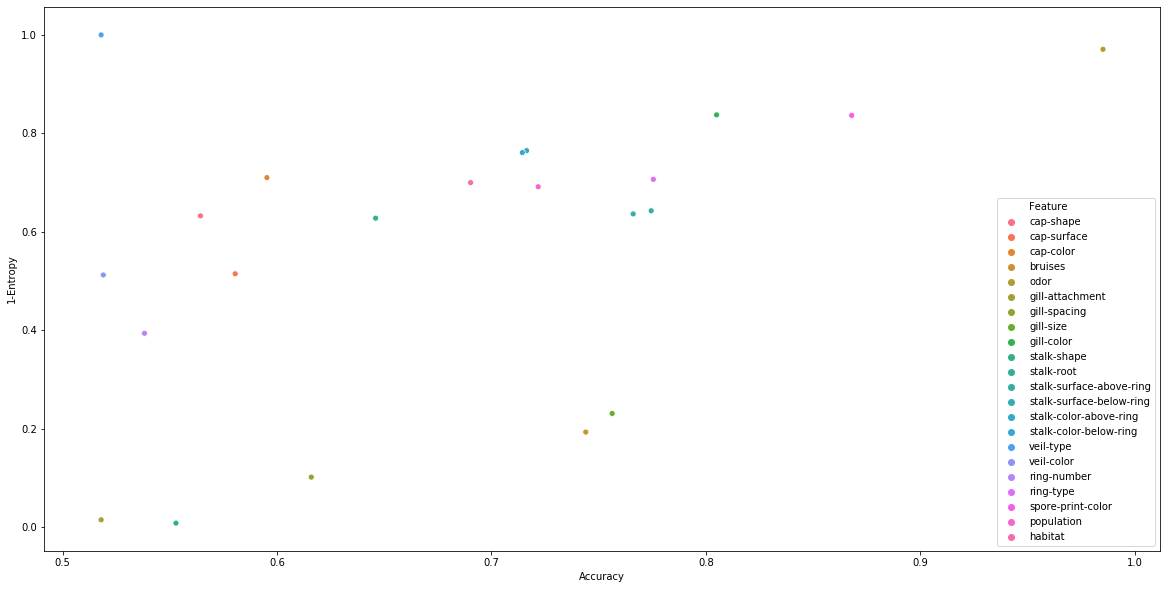

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.scatterplot(x='Accuracy', y='1-Entropy', hue='Feature', data=result_set)

### veil-type, odor, gill-color, spore-print-color are top features which alone can define the whole data

In [17]:
result_set.sort_values(by='1-Entropy', ascending=False)

,Feature,Accuracy,Gini,1-Entropy
15,veil-type,0.5180,0.5006,1.0000
4,odor,0.9852,0.9715,0.9707
8,gill-color,0.8050,0.7321,0.8376
19,spore-print-color,0.8680,0.7835,0.8365
13,stalk-color-above-ring,0.7164,0.6382,0.7649
14,stalk-color-below-ring,0.7144,0.6329,0.7610
2,cap-color,0.5953,0.5245,0.7101
18,ring-type,0.7755,0.6824,0.7067
21,habitat,0.6903,0.5974,0.7000
20,population,0.7218,0.6193,0.6916


<h2> P3 : MUSHROOM NB/DT </h2>

In [18]:
col_names = ['class',
             'cap-shape',
             'cap-surface',
             'cap-color',
             'bruises',
             'odor',
             'gill-attachment',
             'gill-spacing',
             'gill-size',
             'gill-color',
             'stalk-shape',
             'stalk-root',
             'stalk-surface-above-ring',
             'stalk-surface-below-ring',
             'stalk-color-above-ring',
             'stalk-color-below-ring',
             'veil-type',
             'veil-color',
             'ring-number',
             'ring-type',
             'spore-print-color',
             'population',
             'habitat']
mushroom = pd.read_csv('DMG-2 Assignment Data Files/Mushroom/agaricus-lepiota.data',
                       index_col=None,
                       header=None,
                       names=col_names)
mushroom.head()

X = mushroom.loc[:, mushroom.columns != 'class']
X = pd.get_dummies(X)
y = mushroom.loc[:, mushroom.columns == 'class']

### Build Naive Bayes and Decision Tree classifiers on the MUSHROOM training dataset.

In [19]:
#use a classic 70:30 split ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

df = pd.DataFrame(columns=['lambda','accuracy', 'type'])
for i in range(0,51) :
    nbc = BernoulliNB(alpha=i)
    nbc.fit(X_train, y_train.values.ravel())
    train_score = accuracy_score(y_train, nbc.predict(X_train))
    test_score = accuracy_score(y_test, nbc.predict(X_test))
    df = df.append({'lambda' : i,'accuracy':train_score, 'type': 'Train'}, ignore_index=True)
    df = df.append({'lambda' : i,'accuracy':test_score, 'type': 'Test'}, ignore_index=True)
    print(i, train_score, test_score)

/Users/anmol/opt/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


0 0.994899753781217 0.9938474159146842
1 0.9416109743228983 0.9364232977850697
2 0.9354555047485051 0.9306808859721083
3 0.9319380935631375 0.9265791632485644
4 0.9287724234963067 0.9249384741591469
5 0.9268378473443546 0.9228876127973749
6 0.9266619767850862 0.9204265791632485
7 0.925606753429476 0.9196062346185397
8 0.9243756595145972 0.918785890073831
9 0.923320436158987 0.9183757178014766
10 0.9226169539219135 0.916735028712059
11 0.9212099894477664 0.9150943396226415
12 0.9206823777699613 0.9146841673502871
13 0.9196271544143511 0.9142739950779327
14 0.9187478016180092 0.9138638228055783
15 0.918220189940204 0.9134536505332239
16 0.9171649665845938 0.9126333059885152
17 0.9169890960253254 0.911402789171452
18 0.9161097432289834 0.911402789171452
19 0.9157580021104467 0.911402789171452
20 0.9152303904326415 0.9101722723543888
21 0.9143510376362997 0.9101722723543888
22 0.9134716848399578 0.9093519278096801
23 0.9134716848399578 0.9089417555373257
24 0.913119943721421 0.908121410992

### In Naïve Bayes classifier plot the value of lambda (x axis) for Laplacian smoothing against training and test set accuracy.

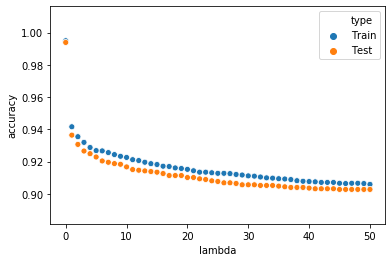

In [20]:
x = sns.scatterplot(x="lambda", y='accuracy', hue='type', data=df)

### For decision tree classifier plot the Size Threshold (x axis) against training and test set accuracy.

In [21]:
df = pd.DataFrame(columns=['size threshold','accuracy', 'type'])
for i in range(4,65,4) :
    dtc = DecisionTreeClassifier(min_samples_split=i)
    dtc.fit(X_train, y_train)
    train_score = accuracy_score(y_train, dtc.predict(X_train))
    test_score = accuracy_score(y_test, dtc.predict(X_test))
    df = df.append({'size threshold' : i,'accuracy':train_score, 'type': 'Train'}, ignore_index=True)
    df = df.append({'size threshold' : i,'accuracy':test_score, 'type': 'Test'}, ignore_index=True)
    print(i, train_score, test_score)

4 1.0 1.0
8 1.0 1.0
12 1.0 1.0
16 1.0 1.0
20 1.0 1.0
24 1.0 1.0
28 1.0 1.0
32 1.0 1.0
36 1.0 1.0
40 0.9984171649665846 0.9971287940935193
44 0.9984171649665846 0.9971287940935193
48 0.9984171649665846 0.9971287940935193
52 0.9984171649665846 0.9971287940935193
56 0.9984171649665846 0.9971287940935193
60 0.9984171649665846 0.9971287940935193
64 0.9984171649665846 0.9971287940935193


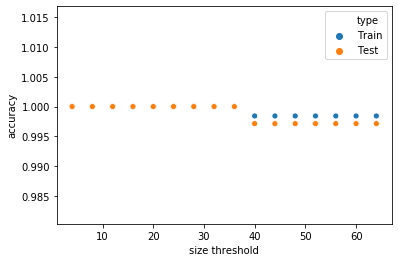

In [22]:
ax = sns.scatterplot(x="size threshold", y='accuracy', hue='type', data=df)
#ax.set_xticks(range(0,68,4))

### Find the best values of lambda and SizeThreshold where the test set accuracies starts to decrease.

In [23]:
#Get summary of best tree at threshold of 36
dtc = DecisionTreeClassifier(min_samples_split=36)
dtc.fit(X_train, y_train)
dtc.get_depth()

6

Looking at plots above, we can say -

- Naive Bayes - Even with very small lambda value for smoothening we are getting best accuracy, ie lambda- 1.0e-10, since 0 is numerically not possible. The next best is lambda = 1
- Decision Tree Classifier - Best size threshold : 36
    
Comparision -
- Naive bayes classifier are surprisingly giving better result on set set as lambda increases, compared to train set which creates doubt.
- Decision Tree Classifier are performing better than Naive Bayes with a test set accuracy of 1 at size threshold of 36, just a depth of 8.

<H2> P4 : MNIST Bayesian </H2>

### Take the MNIST dataset. Lets call it D0 dataset

In [24]:
mnist = pd.read_csv('DMG-2 Assignment Data Files/MNIST/train.csv')
mnist.head()

mnist_data = mnist.loc[:, mnist.columns != 'label']
mnist_label = mnist.loc[:, mnist.columns == 'label']

In [25]:
target_names = pd.Series(mnist.label.unique()).apply(str)
print(target_names)
n_components = 9

0    1
1    0
2    4
3    7
4    3
5    5
6    8
7    9
8    2
9    6
dtype: object


### Do a 9 dimensional PCA projection . Lets call it D1 dataset

In [26]:
pca = decomposition.PCA()
pca.n_components = n_components
pca_data = pca.fit_transform(mnist_data)

### Do a 9 dimensional FISHER projection . Lets call it D2 dataset

In [27]:
model = LinearDiscriminantAnalysis(n_components=n_components)
model.fit(mnist_data, mnist_label.values.ravel())
mnist_fisher_proj_data = model.transform(mnist_data)

/Users/anmol/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


### Build a Bayesian classifier on D1 (single Gaussian per class)
- Diagonal Covariance matrix ( i.e.set non diagonals to zero)
- Full Covariance matrix

Ref :
#Book - Machine Learning: a Probabilistic Perspective
#Quoted - https://stats.stackexchange.com/questions/105140/gaussian-naive-bayes-really-equivalent-to-gmm-with-diagonal-covariance-matrices
#A naive Bayes model with Gaussian 𝑃(𝑋𝑖|𝐶) is equivalent to a mixture of Gaussians with diagonal covariance matrices (Dempster et al., 1977).
#https://scikit-learn.org/stable/modules/mixture.html#bgmm
#https://www.programcreek.com/python/example/99731/sklearn.mixture.BayesianGaussianMixture


In [28]:
def build_classifier(X_train, X_test, y_train, y_test, n_gaussians, target_names) :
    
    #Build bayesian classifier with diagnonal covariance matrix on fisher projection data
    gnb_model = GaussianNB()
    gnb_model.fit(X_train, y_train)
    y_pred = gnb_model.predict(X_test)
    nb_diag_acc = accuracy_score(y_test, y_pred)
    print("Gaussian Naive Bayes diagonal matrix : ")
    print("Train set accuracy score : ", accuracy_score(y_test, y_pred))
    print("Test set accuracy score : ", nb_diag_acc)
    print("Classification report : ")
    print(classification_report(y_test, y_pred, target_names=target_names))

    #Build bayesian classifier with full covariance matrix on fisher projection data
    bgm = BayesianGaussianMixture(
                n_components = n_gaussians,
                covariance_type='full')
    bgm.fit(X_train, y_train)
    y_pred = bgm.predict(X_test)
    #print(y_pred)
    #print(y_test)
    b_full_acc = accuracy_score(y_test, y_pred)
    print("\nBayesian Gaussian mixture full covariance matrix : ")
    print("Train set accuracy : ", accuracy_score(y_test, y_pred))
    print("Test set accuracy : ", b_full_acc)
    print("Classification report : ")
    print(classification_report(y_test, y_pred, target_names=target_names))
    
    #return test accuracies of both model
    return nb_diag_acc, b_full_acc

In [29]:
X_train, X_test, y_train, y_test = train_test_split(pca_data, mnist['label'], test_size=0.2)
print(build_classifier(X_train, X_test, y_train, y_test, 10, target_names))

Gaussian Naive Bayes diagonal matrix : 
Train set accuracy score :  0.768095238095238
Test set accuracy score :  0.768095238095238
Classification report : 
              precision    recall  f1-score   support

           1       0.88      0.85      0.86       823
           0       0.84      0.95      0.89       925
           4       0.84      0.76      0.80       866
           7       0.73      0.72      0.73       864
           3       0.66      0.74      0.70       799
           5       0.61      0.67      0.64       750
           8       0.84      0.83      0.84       811
           9       0.89      0.82      0.85       892
           2       0.73      0.73      0.73       826
           6       0.65      0.58      0.61       844

    accuracy                           0.77      8400
   macro avg       0.77      0.77      0.76      8400
weighted avg       0.77      0.77      0.77      8400


Bayesian Gaussian mixture full covariance matrix : 
Train set accuracy :  0.02714285

/Users/anmol/opt/anaconda3/lib/python3.7/site-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


### Build a Bayesian classifier on D2 (single Gaussian per class)
- Diagonal Covariance matrix ( i.e.set non diagonals to zero)
- Full Covariance matrix

In [30]:
X_train, X_test, y_train, y_test = train_test_split(mnist_fisher_proj_data, mnist['label'], test_size=0.2)
print(build_classifier(X_train, X_test, y_train, y_test, 10, target_names))

Gaussian Naive Bayes diagonal matrix : 
Train set accuracy score :  0.8860714285714286
Test set accuracy score :  0.8860714285714286
Classification report : 
              precision    recall  f1-score   support

           1       0.95      0.94      0.95       823
           0       0.95      0.93      0.94       921
           4       0.88      0.87      0.88       861
           7       0.87      0.85      0.86       814
           3       0.89      0.90      0.90       828
           5       0.84      0.86      0.85       827
           8       0.92      0.93      0.92       817
           9       0.92      0.89      0.90       857
           2       0.79      0.83      0.81       800
           6       0.85      0.85      0.85       852

    accuracy                           0.89      8400
   macro avg       0.89      0.89      0.89      8400
weighted avg       0.89      0.89      0.89      8400


Bayesian Gaussian mixture full covariance matrix : 
Train set accuracy :  0.072023

/Users/anmol/opt/anaconda3/lib/python3.7/site-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


### Compare the test accuracies of the four classifiers and comment.

diagonal covariance matrix - 
- PCA projection - test set accuracy is 0.76
- Fisher projection - test set accuracy is 0.88

If we look at classification matrix for test set, we see that on PCA data, digits 7,3,5 are performing poorly which improves with flscore of 0.83-0.9 range when doing classification modeling on fisher projection data


full covariance matrix - 
- PCA projection - test set accuracy is 0.019
- Fisher projection - test set accuracy is 0.108

## P5 : MNIST KNN / Parzen window

### Take the two datasets D1 and D2 from P4.

Build k Nearest neighbors classifier with:
- K = 1, 3, 5, 7, 9, 11, 13, 15, 17
- Plot training and test accuracy with these values of k on x axis

In [31]:
X_train, X_test, y_train, y_test = train_test_split(pca_data, mnist['label'], test_size=0.2)

In [32]:
df = pd.DataFrame(columns=['k','accuracy', 'type'])
for i in range(1,18,2) :
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    train_score = round(accuracy_score(y_train, knn_model.predict(X_train)),4)
    test_score = round(accuracy_score(y_test, knn_model.predict(X_test)),4)
    df = df.append({'k' : i,'accuracy':train_score, 'type': 'Train'}, ignore_index=True)
    df = df.append({'k' : i,'accuracy':test_score, 'type': 'Test'}, ignore_index=True)
    print(i, train_score, test_score)

1 1.0 0.8943
3 0.948 0.9077
5 0.9367 0.9125
7 0.9315 0.9115
9 0.9289 0.9142
11 0.9251 0.9137
13 0.9217 0.9123
15 0.9193 0.913
17 0.9176 0.9118


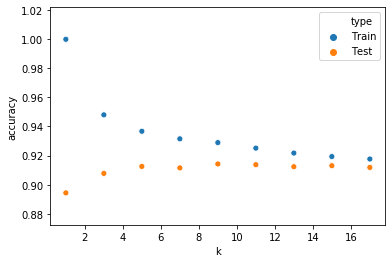

In [33]:
sns.scatterplot(x="k", y='accuracy', hue='type', data=df)

In [34]:
df = pd.DataFrame(columns=['sigma','accuracy', 'type'])
sigma_list = []
for i in np.arange(0.1, 3.1, 0.1) :
    sigma_list.append(round(i,1))
sigma_list
for i in sigma_list :
    kde_model = KernelDensity(bandwidth=i, kernel='gaussian')
    kde_model.fit(X_train)
    train_score = round(accuracy_score(y_train, kde_model.predict(X_train)),4)
    test_score = round(accuracy_score(y_test, kde_model.predict(X_test)),4)
    df = df.append({'sigma' : i,'accuracy':train_score, 'type': 'Train'}, ignore_index=True)
    df = df.append({'sigma' : i,'accuracy':test_score, 'type': 'Test'}, ignore_index=True)
    print(i, train_score, test_score)

AttributeError: 'KernelDensity' object has no attribute 'predict'

In [37]:
kde_model = KernelDensity(bandwidth=0.9, kernel='gaussian')
kde_model.fit(X_train)

log_prob = kde_model.score_samples(X_train)
prob_X_train = np.exp(log_prob) 
prob_X_train.
#kde_model.sample(44, random_state=0)

(33600,)

In [40]:
prob_X_train.shape

(33600,)

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html#sklearn.neighbors.KernelDensity


import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

# load the data
digits = load_digits()

# project the 64-dimensional data to a lower dimension
pca = PCA(n_components=15, whiten=False)
data = pca.fit_transform(digits.data)

# use grid search cross-validation to optimize the bandwidth
params = {'bandwidth': np.logspace(-1, 1, 20)}
grid = GridSearchCV(KernelDensity(), params)
grid.fit(data)

print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))

# use the best estimator to compute the kernel density estimate
kde = grid.best_estimator_

# sample 44 new points from the data
new_data = kde.sample(44, random_state=0)
new_data = pca.inverse_transform(new_data)

# turn data into a 4x11 grid
new_data = new_data.reshape((4, 11, -1))
real_data = digits.data[:44].reshape((4, 11, -1))

# plot real digits and resampled digits
fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(new_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 5].set_title('Selection from the input data')
ax[5, 5].set_title('"New" digits drawn from the kernel density model')

plt.show()

Build Parzen window classifier with:
- Sigma = 0.1, 0.2, 0.3, …, 3.0
- Plot training and test accuracies with these values of sigma.

<h2> P6 : News group Text Classifier </h2>

In [ ]:
#https://www.analyticsvidhya.com/blog/2018/10/stepwise-guide-topic-modeling-latent-semantic-analysis/
#https://medium.com/@dobko_m/nlp-text-data-cleaning-and-preprocessing-ea3ffe0406c1

from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'))
documents = dataset.data

In [ ]:
news_group_dataset = documents

In [ ]:
news_group_dataset = re.sub("[!@#$+%*:()'-]", ' ', news_group_dataset)
news_group_dataset

In [ ]:
# removing everything except alphabets`

text = re.sub("[!@#$+%*:()'-]", ' ', text)
news_group_dataset = news_group_dataset.str.replace("[^a-zA-Z#]", " ")

# removing short words
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# make all text lowercase
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())